# TP N°1 analsis exploratorio properati

In [22]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (15, 5)

prop = pd.read_csv('../data/tp1orga/datosCabaYGBAxx.csv', low_memory=False) #datos1.csv

In [23]:
#vemos la forma en que se muestran los datos
prop.tail()

,Unnamed: 0,created_on,description,expenses,extra,floor,geonames_id,id,lat-lon,place_name,place_with_parent_names,price_aprox_usd,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title
677723,1353138,2014-11-03,Corredor Responsable: Ricardo Demichelli - CUC...,NaN,"{""approximate_geopos"":""zip:1414"",""images"":[""ht...",NaN,3433955.0,NaN,"-34.602863,-58.446205",Villa Crespo,|Argentina|Capital Federal|,1420000.00,NaN,http://capital-federal.properati.com.ar/jalw_v...,store,NaN,NaN,NaN,NaN,"Terreno Villa Crespo 7,80 X 72,43 Zon: C31 FOT..."
677724,1454319,2014-12-29,Local comercial libre sin columnas.Ubicado ent...,NaN,"{""images"":[""http://services.neoinmuebles.com/i...",NaN,3433955.0,NaN,"-34.6025471906,-58.3795731029",San Nicolás,|Argentina|Capital Federal|,1250000.00,1329.787234,http://www.properati.com.ar/k733_venta_local_c...,store,1.0,NaN,NaN,940.000000,Suipacha 500
677725,1460783,2015-02-16,Corredor Responsable: Ariel Champanier ( C.U.C...,NaN,"{""images"":[""http://pics.onemls.org/Z7L3A/1a478...",NaN,3433955.0,NaN,"-34.5817154651,-58.4336028316",Palermo,|Argentina|Capital Federal|,350000.00,NaN,http://www.properati.com.ar/kx3x_venta_local_c...,store,NaN,NaN,NaN,NaN,UNICO LOCAL en PALERMO HOLLYWOOD!!sobre Fitz R...
677726,1460991,2015-02-20,Corredor Responsable: Ariel Champanier ( C.U.C...,NaN,"{""images"":[""http://pics.onemls.org/nnKAa/389a1...",3.0,3433955.0,NaN,"-34.5893543697,-58.4092879482",Recoleta,|Argentina|Capital Federal|,5514.19,NaN,http://www.properati.com.ar/l05m_venta_local_c...,store,NaN,NaN,NaN,NaN,Oficina de 240 m2 a estrenar
677727,1618021,2017-01-31,"Local con Teléfono en Billinghurst 400, Argent...",NaN,NaN,NaN,3433955.0,c3900c471fadd13cb8a9d50d332ff961a5366cef,"-34.6057517962,-58.4161114565",Almagro,|Argentina|Capital Federal|,78000.00,49644.504000,http://www.properati.com.ar/15bjt_venta_local_...,store,NaN,Capital Federal,25.0,1.571171,"Local con Teléfono en Billinghurst 400, Argent..."


In [24]:
#los tipos de datos de cada columna
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677728 entries, 0 to 677727
Data columns (total 20 columns):
Unnamed: 0                 677728 non-null int64
created_on                 677728 non-null object
description                388470 non-null object
expenses                   33325 non-null object
extra                      223997 non-null object
floor                      147539 non-null float64
geonames_id                550938 non-null float64
id                         164480 non-null object
lat-lon                    506376 non-null object
place_name                 677651 non-null object
place_with_parent_names    677728 non-null object
price_aprox_usd            677728 non-null float64
price_usd_per_m2           530502 non-null float64
properati_url              677728 non-null object
property_type              677728 non-null object
rooms                      398952 non-null float64
state_name                 164480 non-null object
surface_covered_in_m2      145831 no

In [25]:
#agregamos la columna año luego de splitearla
prop_fecha=prop['created_on'].str.split(' ',3,expand=True) 
a=prop_fecha[0].str.split('-',3,expand=True)
 
prop['year']=a[0]
prop['month']=a[1]
prop['day']=a[2]
prop =prop


# ¿cuales son las zonas mas costosas de Bs As?

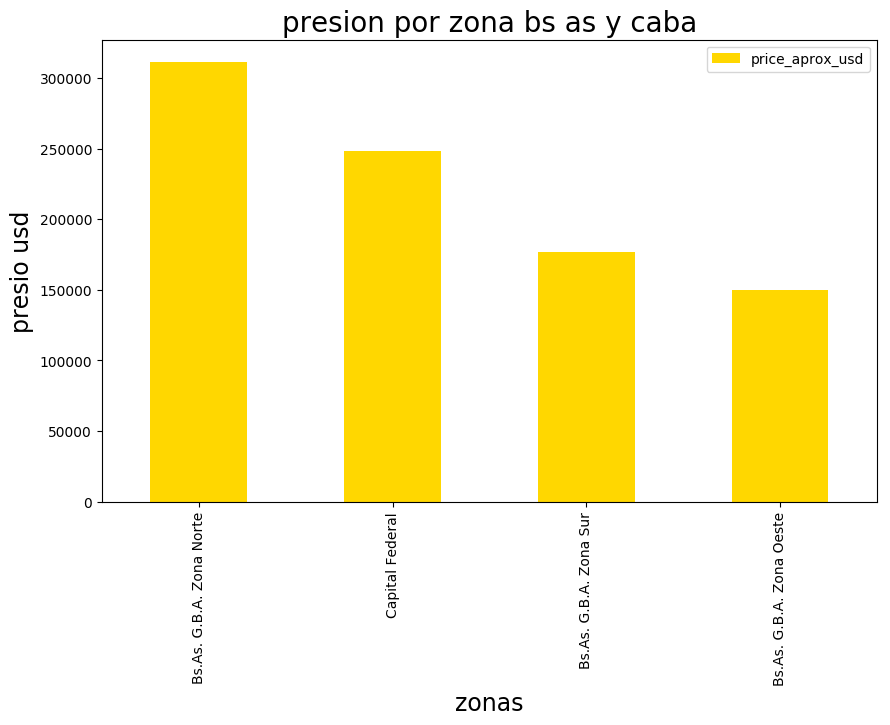

In [26]:
zonas = prop[['state_name','price_aprox_usd']].groupby('state_name')\
.agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending=False).plot(kind='bar',color='gold',figsize=(10,6))
zonas
plt.title('presion por zona bs as y caba', fontsize=20);
plt.ylabel('presio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

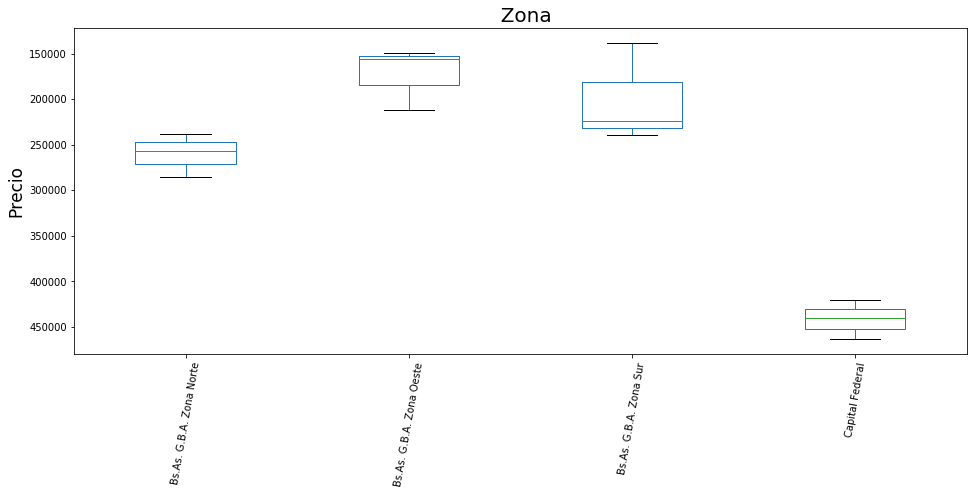

In [59]:
 # Variacion del precio  segun la zona
promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 20 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 20 )]
prop2 = cercanas.dropna(subset=['price_aprox_usd'])

prop3 = prop2[['state_name','price_aprox_usd','year']]\
        .pivot_table(index='year',columns='state_name')
prop3.columns = prop3.columns.droplevel()
prop3.plot.box(figsize=(16,6),rot=80);
plt.gca().invert_yaxis()
plt.title('  Zona', fontsize=20);
plt.ylabel('Precio', fontsize=17);
 

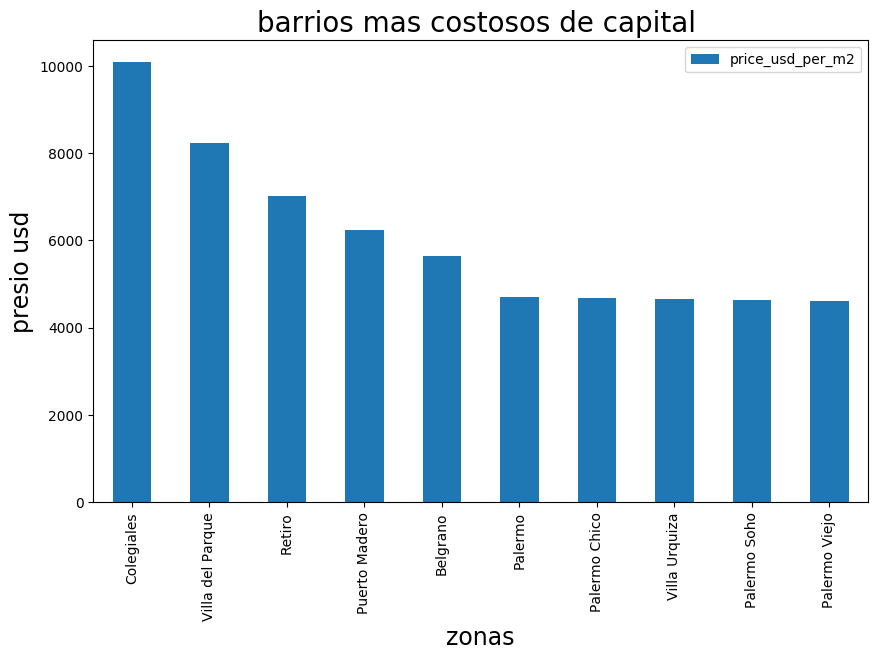

In [28]:
#¿barrios mas costosos Capital Federal precio total cercano a la media?

promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 40 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 40 )]
capital = cercanas.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_cap = capital[['state_name','place_name','price_usd_per_m2']][capital['state_name']=="Capital Federal"]\
.groupby('place_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).head(10).plot(kind='bar',figsize=(10,6))
top_mayor_prom_pre_cap
plt.title('barrios mas costosos de capital ', fontsize=20);
plt.ylabel('presio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

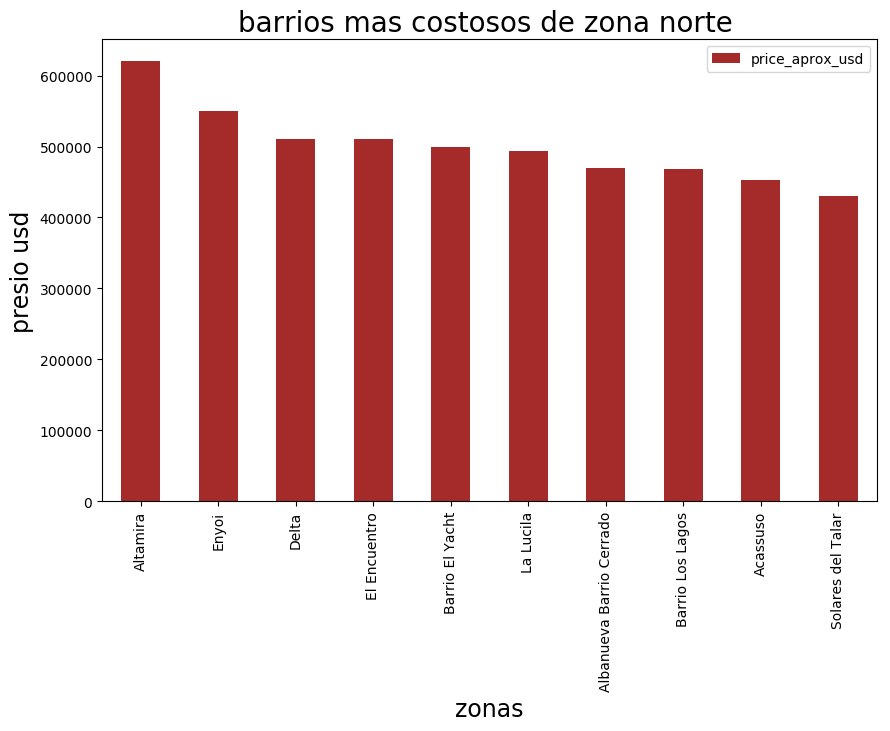

In [29]:
#¿barrios mas costosos zona norte?
promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 40 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 40 )]
zonanorte = cercanas.dropna(subset=['price_aprox_usd'])
zonanorte = zonanorte.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_nor = zonanorte[['state_name','place_name','price_aprox_usd']][zonanorte['state_name']=="Bs.As. G.B.A. Zona Norte"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False).head(30).head(10).plot(kind='bar',color = 'brown',figsize=(10,6))
top_mayor_prom_pre_nor
plt.title('barrios mas costosos de zona norte ', fontsize=20);
plt.ylabel('presio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

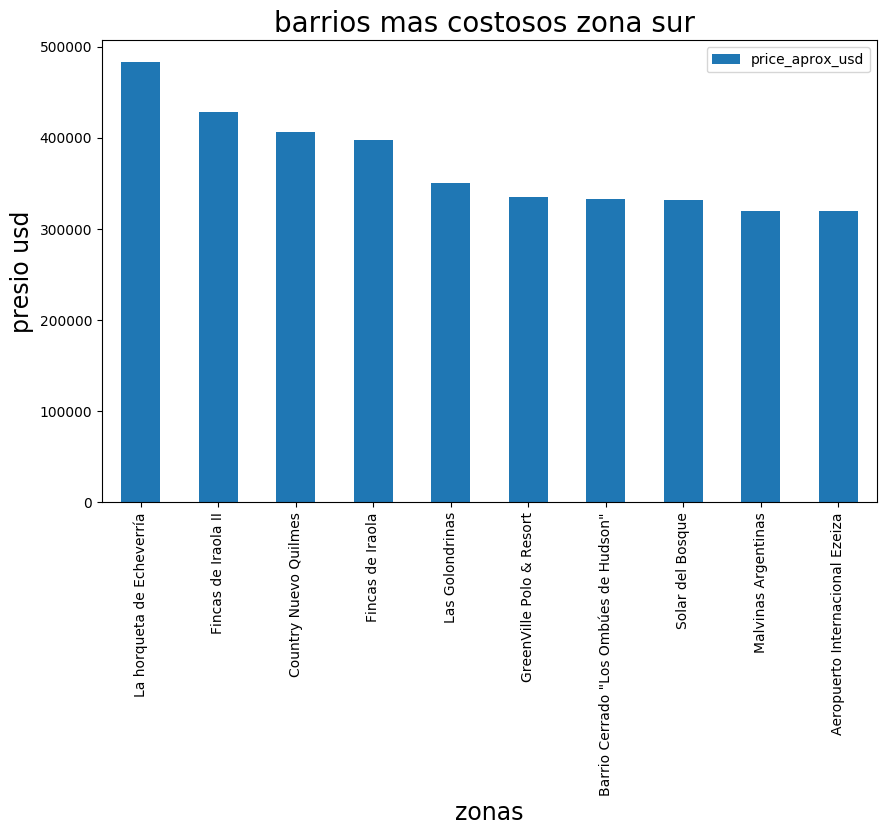

In [30]:
#¿barrios mas costosos zona sur?
promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 40 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 40 )]
zonasur = cercanas.dropna(subset=['price_aprox_usd'])
zonasur = zonasur.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_sur = zonasur[['state_name','place_name','price_aprox_usd']][zonasur['state_name']=="Bs.As. G.B.A. Zona Sur"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False).head(10).plot(kind='bar',figsize=(10,6))
top_mayor_prom_pre_sur
plt.title('barrios mas costosos zona sur ', fontsize=20);
plt.ylabel('presio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

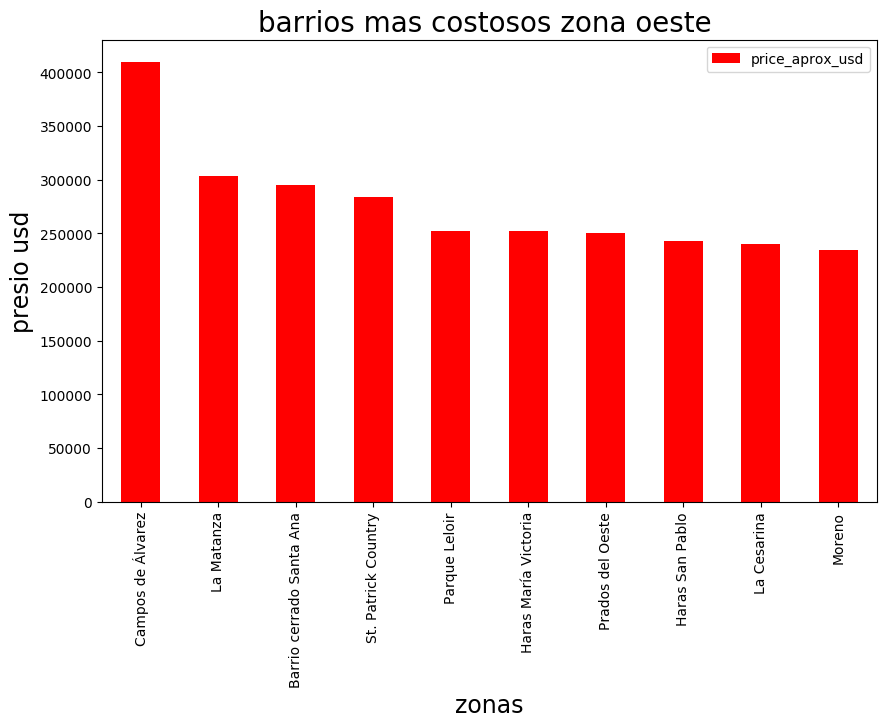

In [31]:
#¿barrios mas costosos zona oeste?
promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 40 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 40 )]
zonaoeste = cercanas.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_oes = zonaoeste[['state_name','place_name','price_aprox_usd']][zonaoeste['state_name']=="Bs.As. G.B.A. Zona Oeste"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False).head(10).plot(kind='bar',color='red',figsize=(10,6))
top_mayor_prom_pre_oes
plt.title('barrios mas costosos zona oeste ', fontsize=20);
plt.ylabel('presio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

### lo que se observa de este analisis es que en zona norte y zona sur entre los barrios mas costosos se encuentran los barrios privados

# ¿de los departamentos en capital federal buscamos los barrios con edifcios mas costosos? 

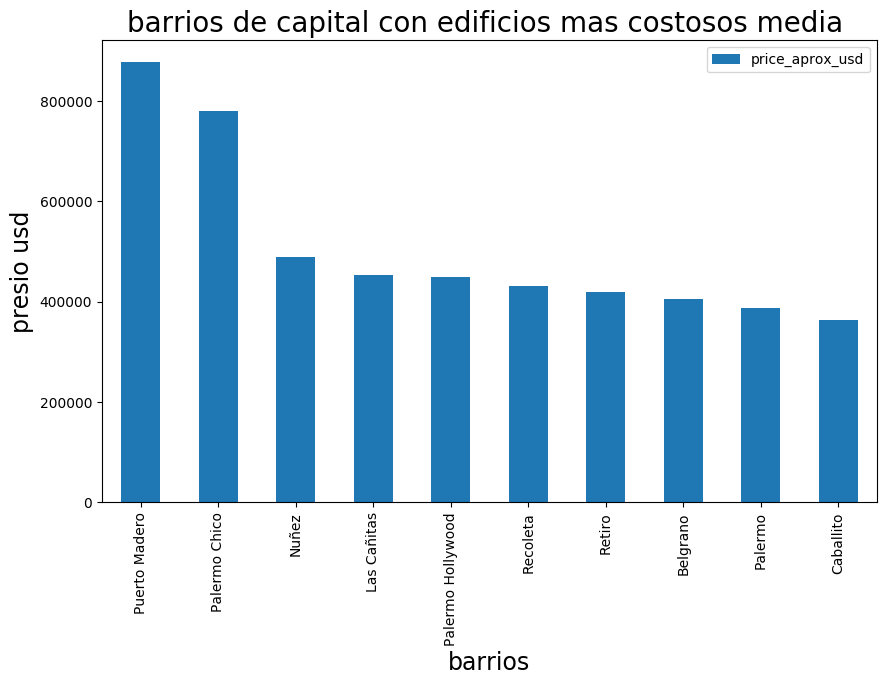

In [32]:
#de los departamentos de que se encuentran entre el piso 15 y 100 de su edificio
#de estos los barrios mas costosos de capital
promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 40 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 40 )]
edif = cercanas.dropna(subset=['floor'])
capital = edif['state_name']=="Capital Federal"
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&capital&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res=res.groupby('place_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending = 0).head(10)\
.plot(kind = 'bar',figsize=(10,6))
res
plt.title('barrios de capital con edificios mas costosos media ', fontsize=20);
plt.ylabel('presio usd', fontsize=17);
plt.xlabel('barrios', fontsize=17);

### el barrios con edificios mas costosos resultaron ser puerto madero , es un barrio reconocido por sus elevados precios

# barrios edificios mas costosos zona norte

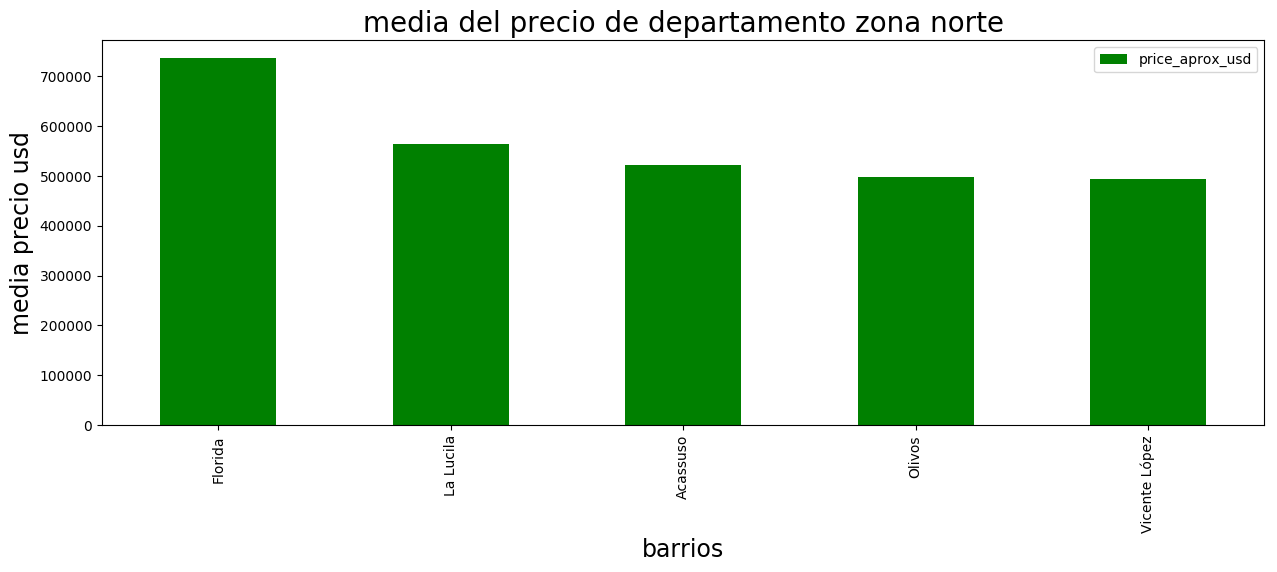

In [33]:
#de los departamentos de que se encuentran entre el piso 15 y 100 de su edificio
#de estos los barrios mas costosos de zona norte
promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 40 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 40 )]
edif = cercanas.dropna(subset=['floor'])
norte = edif['state_name']=="Bs.As. G.B.A. Zona Norte"
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas0=edif['floor'] > 0
res=edif[departamento&norte&menos100&mas0][['place_name','price_aprox_usd','floor','state_name']]
res=res.groupby('place_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending = 0).head(5)\
.plot(kind ='bar',color = 'green')
res
plt.title('media del precio de departamento zona norte', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('barrios', fontsize=17);


# ¿para cada distrito el precio medio de los departmanetos?

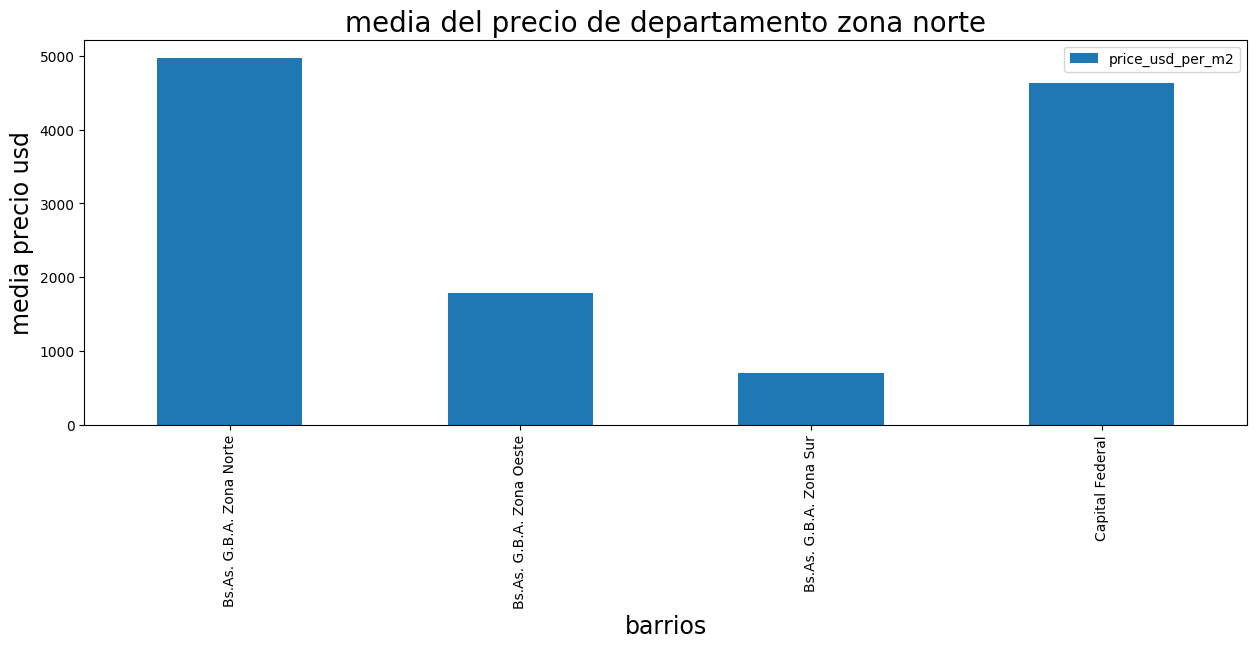

In [34]:
#comparacion de precios de departamentos por distrito
promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 10 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 10 )]
edif = cercanas.dropna(subset=['floor'])
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas0=edif['floor'] > 0
res=edif[departamento&menos100&mas0][['place_name','price_usd_per_m2','floor','state_name']]
res.groupby('state_name').agg({'price_usd_per_m2':'mean'}).plot(kind = 'bar')
plt.title('media del precio de departamento zona norte', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('barrios', fontsize=17);


### de este grafico obtenes que en zona norte y capital federal se encuentran los departamentos mas costosos de buenos aires y el conurbano

# ¿cual es la media de precios para cada tipo de propiedad?

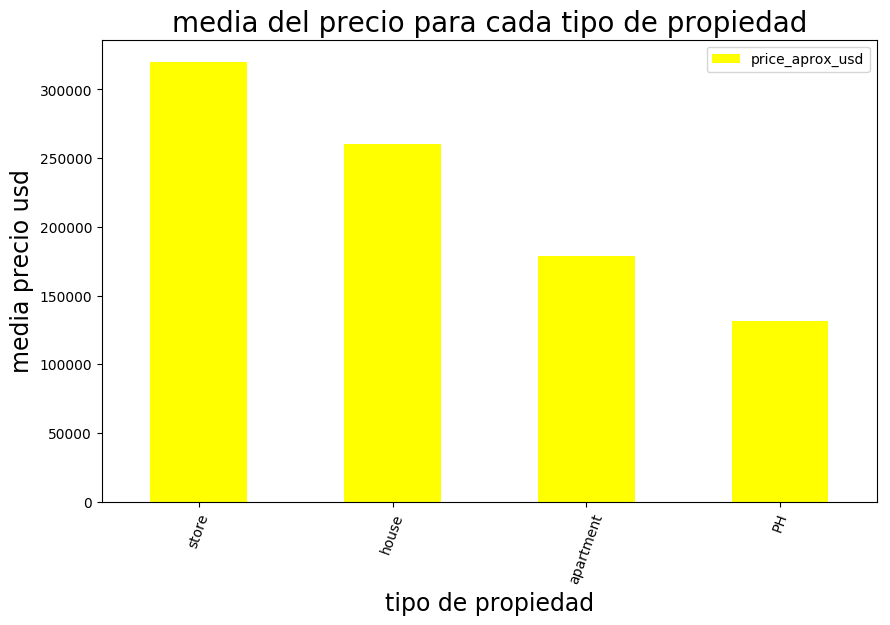

In [35]:
# para todos las zonas cuales propiedades son mas costosas de media
promSupTotal = prop["surface_total_in_m2"].mean()
cercanas = prop[(prop["surface_total_in_m2"] < promSupTotal + 300 ) &\
                    (prop["surface_total_in_m2"] > promSupTotal - 300 )]
propiedades = cercanas[['state_name','place_name','price_aprox_usd','property_type']]\
.groupby('property_type').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
propiedades.plot(kind='bar', rot=70, figsize=(10,6), color='yellow', fontsize=10, grid=False);
plt.title('media del precio para cada tipo de propiedad', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('tipo de propiedad', fontsize=17);

### de aqui extraemos que los locales y departamentos son las propiedades mas costosas de media de buenos aires 

# ¿cual es el precio medio de cada tipo de propiedad por zona de bs as?

In [36]:
 #precio promedio segun el tipo de propiedad
data_prom = []
tipos = ["apartment", "house", "store", "PH"] 
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona1 = {}
     
    for tipo_prop in tipos:
        
        promedio  = prop[(prop['state_name'] == zona) &\
                                      (prop["property_type"] == tipo_prop)]["price_aprox_usd"].mean()
        info_zona1["Zona"] = zona
        info_zona1[tipo_prop ] = promedio 
         
    data_prom.append(info_zona1)

propprecio = pd.DataFrame(data_prom)
propprecio

,PH,Zona,apartment,house,store
0,179417.766346,Capital Federal,228906.996560,452882.730755,464351.782692
1,129860.965115,Bs.As. G.B.A. Zona Norte,191713.346994,412169.239763,505284.940879
2,92220.678887,Bs.As. G.B.A. Zona Sur,112076.968262,227713.917916,339480.326790
3,102721.313384,Bs.As. G.B.A. Zona Oeste,107642.335454,193343.983208,280977.033158


In [37]:
propprecio["Zona"] = propprecio["Zona"].str.replace("Capital Federal","CABA")
propprecio["Zona"] = propprecio["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
propprecio["Zona"] = propprecio["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
propprecio["Zona"] = propprecio["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
propprecio.index = propprecio.Zona

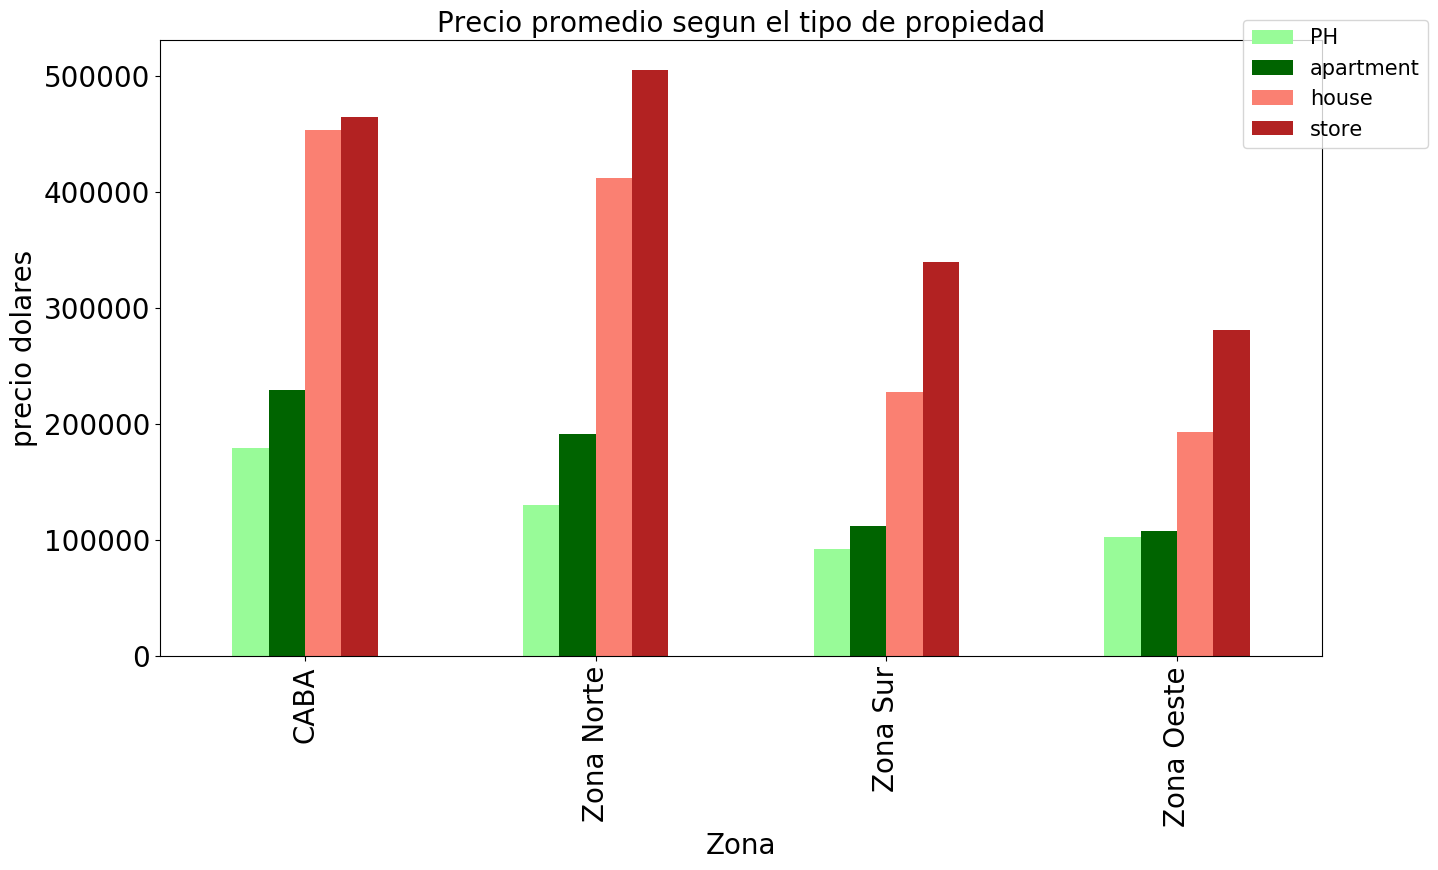

In [38]:
ax = propprecio.plot(kind = "bar",\
                            color =["palegreen","darkgreen","salmon","firebrick","lightskyblue","royalblue","lightpink","crimson"] ,\
                            fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("precio dolares", fontsize=20)
ax.set_title('Precio promedio segun el tipo de propiedad', fontsize = 20)
ax.legend(bbox_to_anchor=(1.1, 1.05), fontsize = 15)

### conclusion: de esto se puede decir que en todos las zonas  los tipos de propiedades respetan sus costos,es decir siempre los locales y las casas son los mas costosos, y luego los departamentos y los ph siguen en precio, en el orden mencionado, tambien se observa que el precio de los locales y casas duplica en media al precio de departamentos y ph respectivamente

# ¿como varias el precio de las casas y departamentos si tienen o no pileta?

In [39]:
## ver precio casas sin pileta y con pileta

prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
pileta = a.description.str.contains("pileta") 
casa = a.property_type == 'house'
e = a.surface_covered_in_m2<170
f = a.surface_covered_in_m2>70
casas_sin_pileta = a[~pileta & casa &e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta = a[pileta & casa&e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]

data_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_piletas = casas_pileta[casas_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_nopil = casas_sin_pileta[casas_sin_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["Zona"] = zona
    info_zona["pileta"] = promedio_piletas
    info_zona["sin pileta"] = promedio_nopil
    data_zona.append(info_zona)




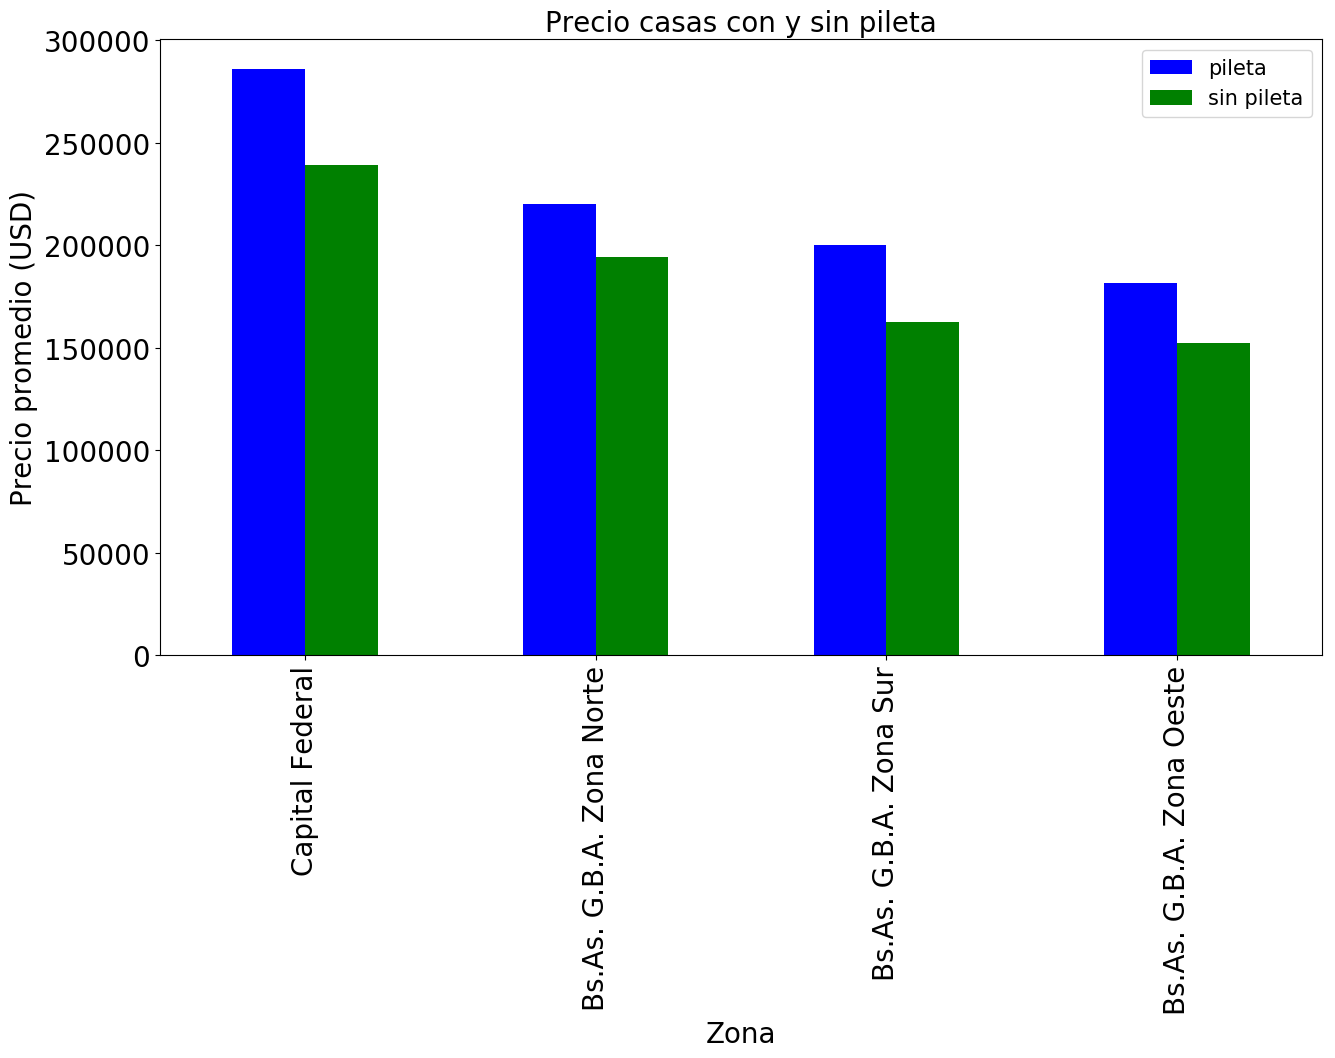

In [40]:
esquinas = pd.DataFrame(data_zona)
tpileta = pd.DataFrame(data_zona)
tpileta["Zona"] = tpileta["Zona"].str.replace("Capital Federal","CABA")
tpileta["Zona"] = tpileta["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
tpileta["Zona"] = tpileta["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
tpileta["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
tpileta.index = esquinas.Zona

ax = tpileta.plot(kind = "bar", color =["b","g"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio casas con y sin pileta', fontsize = 20)
ax.legend(fontsize = 15)



In [41]:
## ver precio casas sin pileta y con pileta

prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
pileta = a.description.str.contains("pileta") 
casa = a.property_type == 'apartment'
e = a.surface_covered_in_m2<170
f = a.surface_covered_in_m2>50
casas_sin_pileta = a[~pileta & casa &e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta = a[pileta & casa&e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]

data_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_piletas = casas_pileta[casas_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_nopil = casas_sin_pileta[casas_sin_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["Zona"] = zona
    info_zona["pileta"] = promedio_piletas
    info_zona["sin pileta"] = promedio_nopil
    data_zona.append(info_zona)




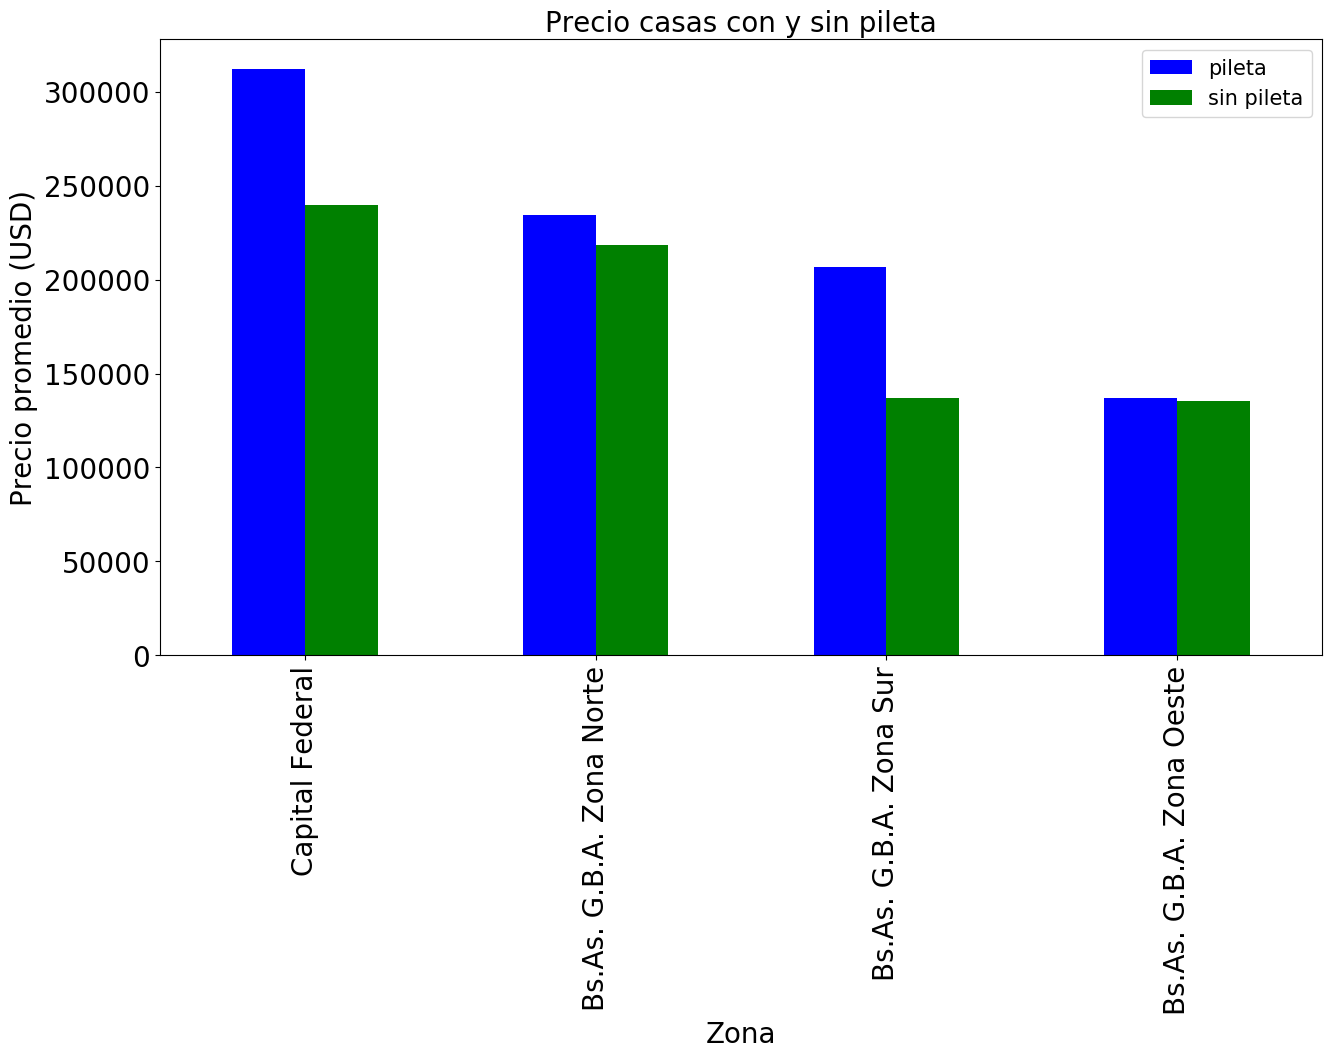

In [42]:
esquinas = pd.DataFrame(data_zona)
tpileta = pd.DataFrame(data_zona)
tpileta["Zona"] = tpileta["Zona"].str.replace("Capital Federal","CABA")
tpileta["Zona"] = tpileta["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
tpileta["Zona"] = tpileta["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
tpileta["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
tpileta.index = esquinas.Zona

ax = tpileta.plot(kind = "bar", color =["b","g"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio casas con y sin pileta', fontsize = 20)
ax.legend(fontsize = 15)



### como era de esperar si las cosas en departamentos poseen pileta el precio aumenta y es una tendencia en todas las zonas

# ¿hay diferencia de precio entre casas y chalets?

In [43]:
## ver precio departamento sin pileta y con pileta

prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
chalet = a.description.str.contains("chalet")
c = a.property_type == 'house'

e = a.surface_total_in_m2<200
f = a.surface_total_in_m2>60
casas = a[~chalet & c &e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]
chalet = a[chalet & c&e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]

data_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_ca = casas[casas["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_ch = chalet[chalet["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["Zona"] = zona
    info_zona["chalet"] = promedio_ch
    info_zona["casa"] = promedio_ca
    data_zona.append(info_zona)

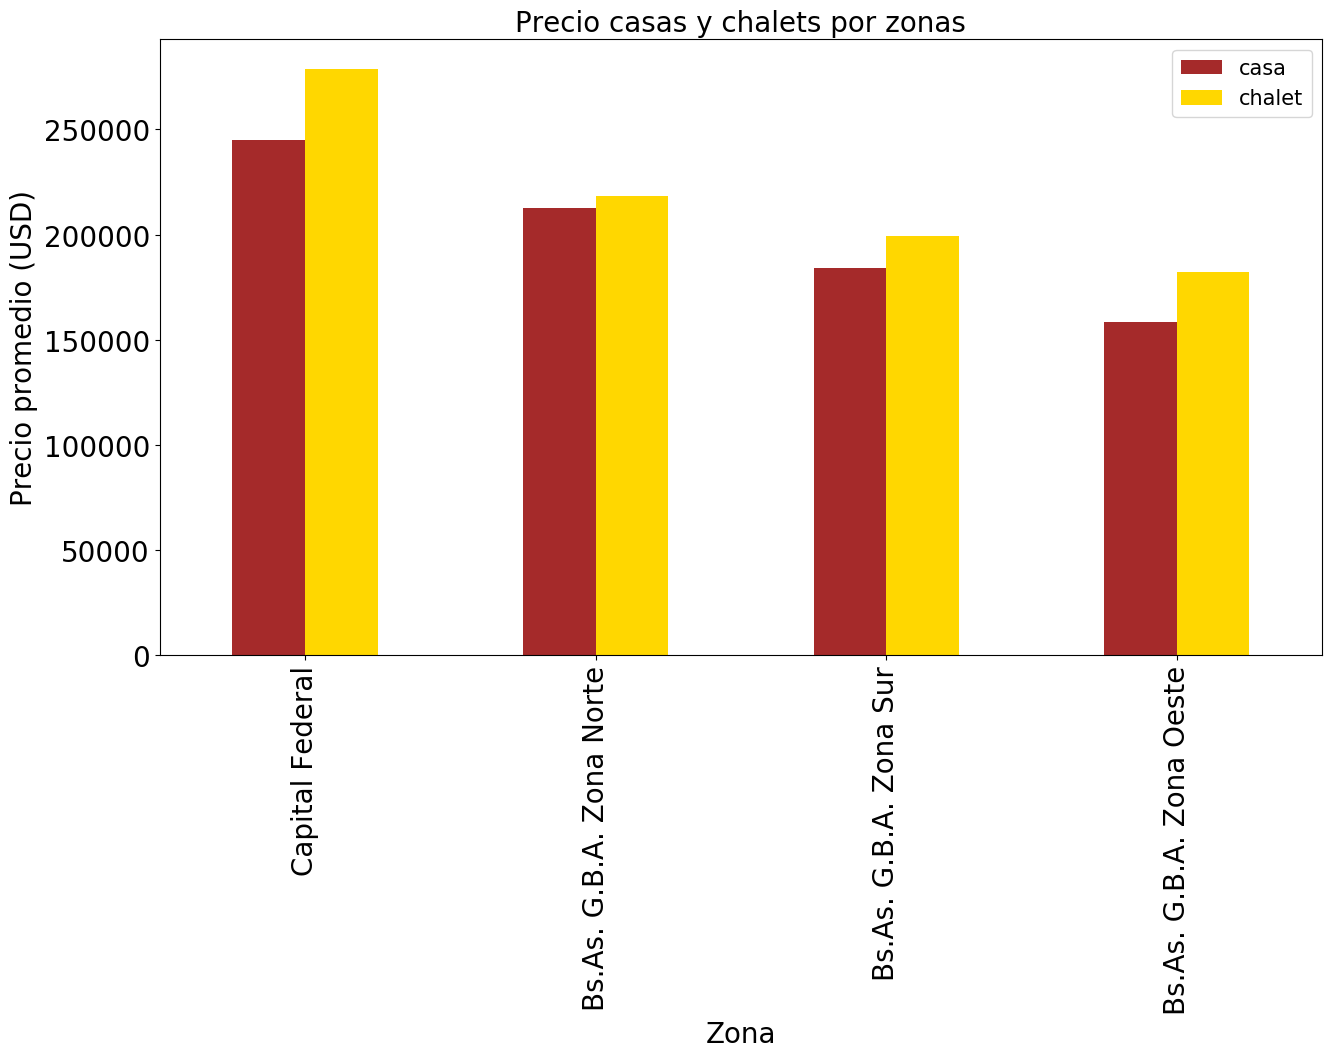

In [44]:
esquinas = pd.DataFrame(data_zona)
#esquinas
chca = pd.DataFrame(data_zona)
chca["Zona"] = chca["Zona"].str.replace("Capital Federal","CABA")
chca["Zona"] = chca["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
chca["Zona"] = chca["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
chca["Zona"] = chca["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
chca.index = esquinas.Zona

ax = chca.plot(kind = "bar", color =["brown","gold"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio casas y chalets por zonas', fontsize = 20)
ax.legend(fontsize = 15)


### nuevamente es un resultado logico ya que los chalets suelen ser mas costosos que las casas y es una tendencia en todas las zonas

# ¿como afecta que una casa tenga patio a su precio en cada zona?

In [45]:
## ver precio can y sin patio

prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
patio = a.description.str.contains("patio")
casa = a.property_type == 'house'

areatotal = a.surface_total_in_m2
cubierta = a.surface_covered_in_m2
#f = a.surface_total_in_m2>60
casas_sin_patio = a[ casa &areatotal&f & (areatotal-cubierta) == 0]#[['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_patio = a[ casa&areatotal&(areatotal-cubierta) != 0]#[['price_aprox_usd','place_name','surface_covered_in_m2']]

data_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_patio = casas_patio[casas_patio["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_sin_patio = casas_sin_patio[casas_sin_patio["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["Zona"] = zona
    info_zona["patio"] = promedio_patio
    info_zona["sin patio"] = promedio_sin_patio
    data_zona.append(info_zona)


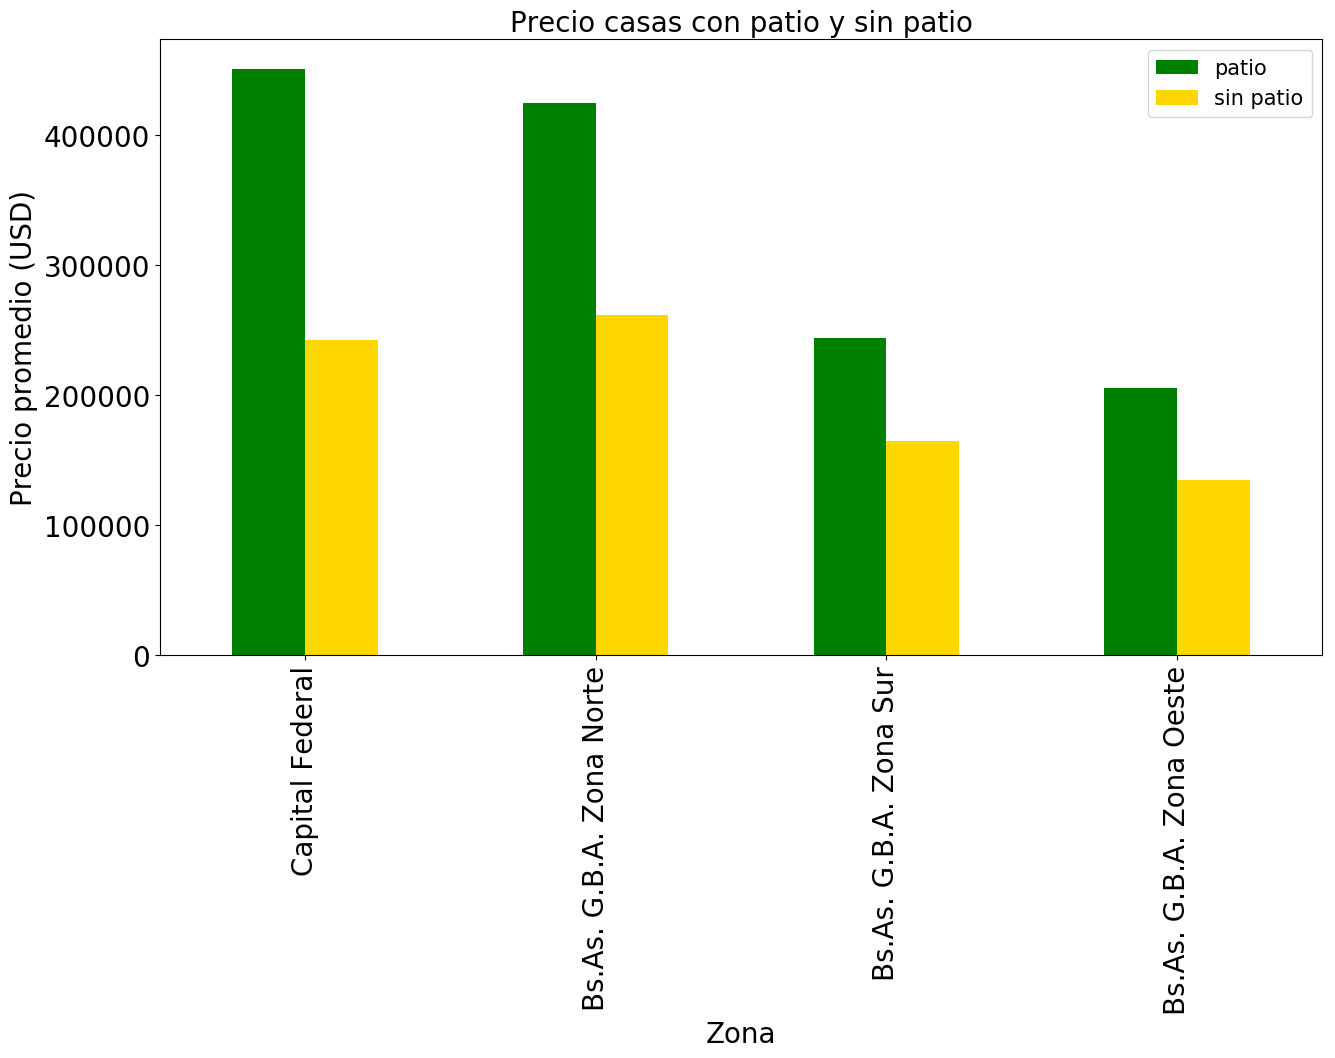

In [46]:
esquinas = pd.DataFrame(data_zona)
#esquinas
verpatio = pd.DataFrame(data_zona)
verpatio["Zona"] = verpatio["Zona"].str.replace("Capital Federal","CABA")
verpatio["Zona"] = verpatio["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
verpatio["Zona"] = verpatio["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
verpatio["Zona"] = verpatio["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
verpatio.index = esquinas.Zona

ax = verpatio.plot(kind = "bar", color =["green","gold"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio casas con patio y sin patio', fontsize = 20)
ax.legend(fontsize = 15)


### la forma en que se filtro para ver que tiene patio fue realizar la resta del area_total -area_cubierta de esa forma el area restante seria considerado patio, de este analisis se puede concluir que las casas con patio son mas costosas y en capital federal esa diferenci es la mayor segun se aprecia en el grafico 

# ¿zona con mayor cantidad de ambientes media?

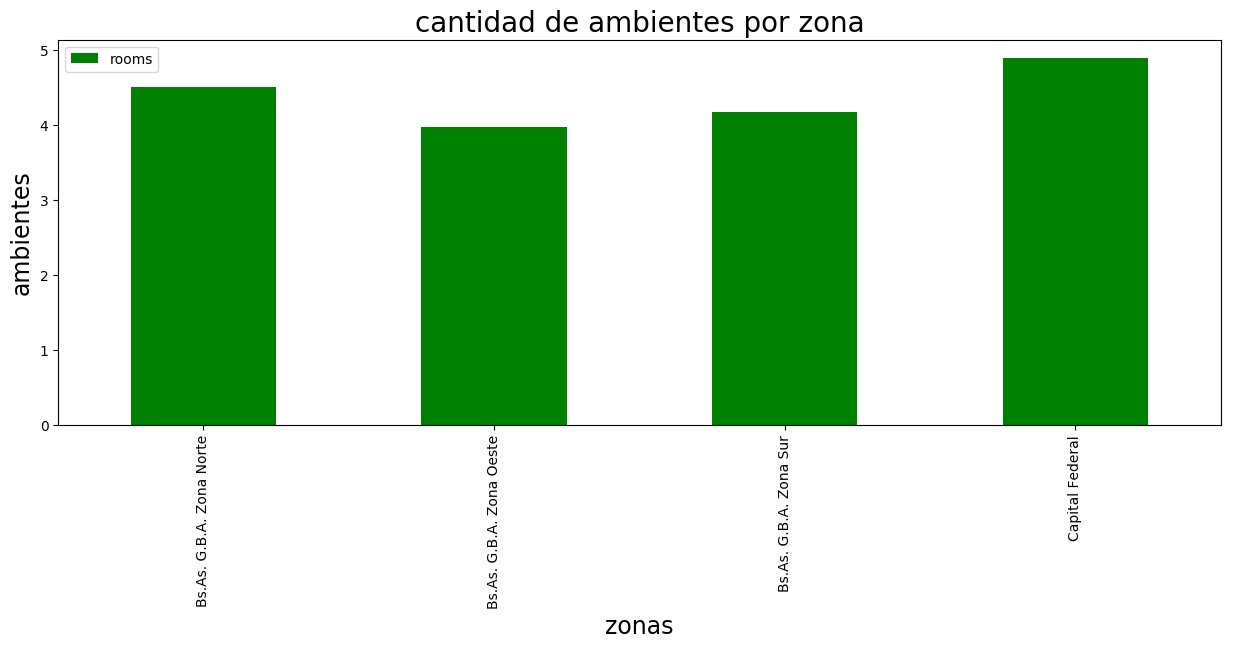

In [47]:
edif = prop.dropna(subset=['price_usd_per_m2'])

casa = edif['property_type'] == "house"

res=edif[casa][['place_name','price_aprox_usd','floor','state_name','rooms']]
res.groupby('state_name').agg({'rooms':'mean'}).plot(kind = 'bar',color='green' )
plt.title('cantidad de ambientes por zona', fontsize=20);
plt.ylabel('ambientes', fontsize=17);
plt.xlabel('zonas', fontsize=17);

### la media de cantidad de ambientos por zona suele ser entre 4 y 5 y capital es el que mas ambientes de media posee 

# ¿variara el precio en funcion de la cantidad de ambientes?

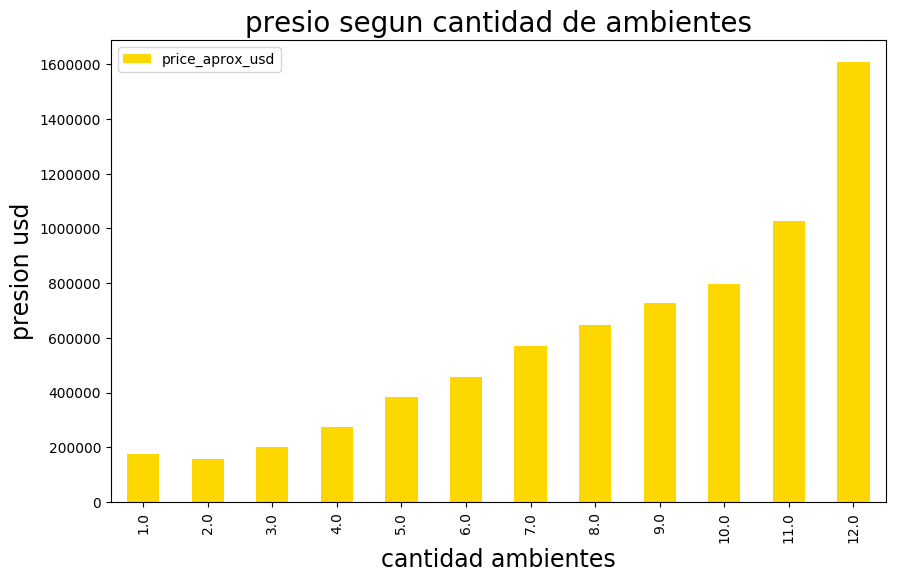

In [48]:
#¿precio por cantidad ambientes?

edif = prop.dropna(subset=['price_usd_per_m2'])
edif = prop.dropna(subset=['rooms'])
#departamento = edif['property_type'] == "apartment"
casa = edif['property_type'] == "house"
ambientes = edif['rooms'] < 13
noambientes0 = edif['rooms'] > 0
res=edif[noambientes0 & casa & ambientes][['place_name','price_aprox_usd','floor','state_name','rooms']]
res.groupby('rooms').agg({'price_aprox_usd':'mean'}).plot(kind = 'bar',color='gold',figsize=(10,6) )
plt.title('presio segun cantidad de ambientes', fontsize=20);
plt.ylabel('presion usd', fontsize=17);
plt.xlabel('cantidad ambientes', fontsize=17);

### se observa que a medida que las casas aumentan su numero de ambientes el precio va aumentando tambien se aprecia que hay una correlacion entre ambas variables, tiene sentido ya que casas de mas ambientes suelen tener una mayor superficie cubierta y esto aumenta su precio

# zonas con mayor superficie cubierta

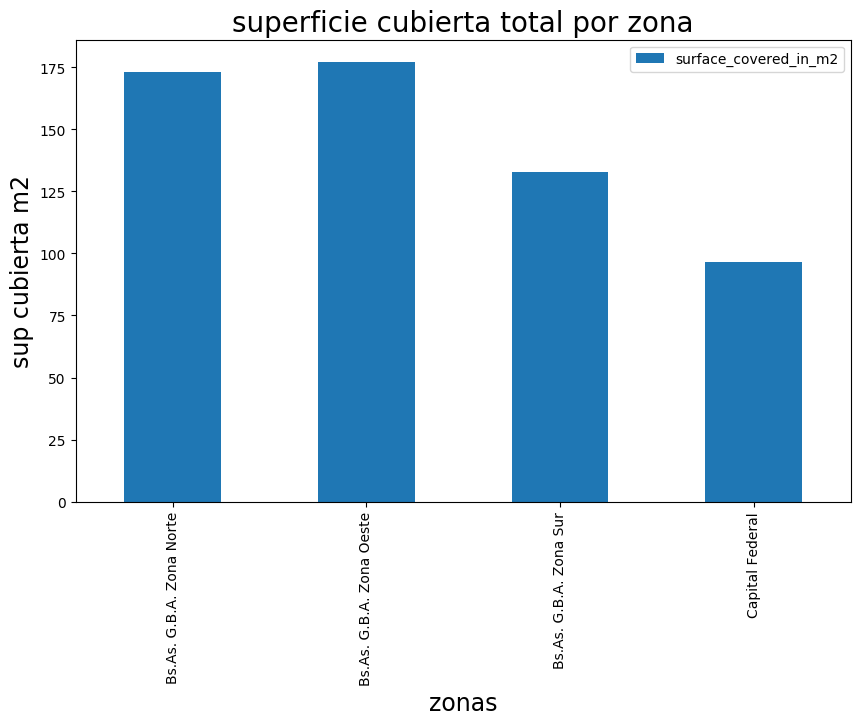

In [49]:
prop[['surface_covered_in_m2','state_name']].groupby('state_name').agg({'surface_covered_in_m2':'mean'})\
.plot(kind='bar',figsize=(10,6))
plt.title('superficie cubierta total por zona', fontsize=20);
plt.ylabel('sup cubierta m2', fontsize=17);
plt.xlabel('zonas', fontsize=17);

### de aqui podemos extraer que zona oeste y zona norte poseen las propiedades de mayor tamaño, y en capital federal se encuentran las de menor superficie cubierta lo cual tiene sentido ya que la gran mayorio son edificios y estan todos muy comprimidos para aprovechar mejor el espacio ya que es una zona limitada que posee siempre un aumento de poblacion y densidad de departamentos constante ya que es la zona mas demandada de bs as, en cambio en los otros barrios hay capacidad para construir casas de mayor tamaño

# ¿como vario a lo largo del tiempo el precio para los diferentes tipos de propiedades?

## precio ph en el tiempo

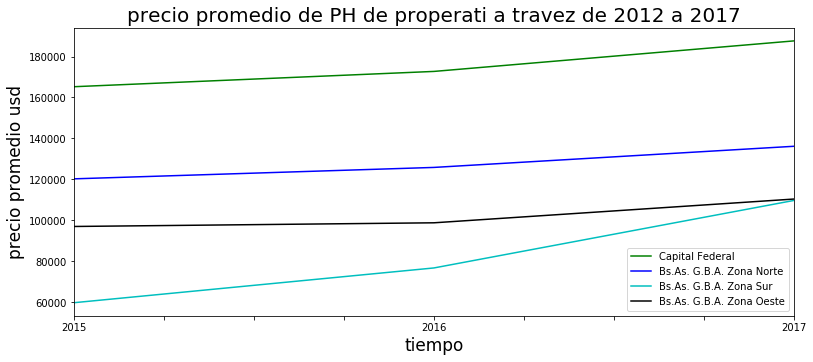

In [50]:
#precio promedio de PH de properati a travez de 2012 a 2017
%matplotlib inline

fig = plt.figure(figsize=(10,4));
ax = fig.add_axes([0,0,1,1]);


 
capital=prop["state_name"]=="Capital Federal"
zn=prop["state_name"]=="Bs.As. G.B.A. Zona Norte"
zs=prop["state_name"]=="Bs.As. G.B.A. Zona Sur"
zo=prop["state_name"]=="Bs.As. G.B.A. Zona Oeste"
ph= prop["property_type"]=="PH"
prop[['year','price_aprox_usd']][capital&ph].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='g',label="Capital Federal")



prop[['year','price_aprox_usd']][zn&ph].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='b',label="Bs.As. G.B.A. Zona Norte")

prop[['year','price_aprox_usd']][zs&ph].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='c',label="Bs.As. G.B.A. Zona Sur")

prop[['year','price_aprox_usd']][zo&ph].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='k',label="Bs.As. G.B.A. Zona Oeste")

plt.title('precio promedio de PH de properati a travez de 2012 a 2017', fontsize=20);
plt.ylabel('precio promedio usd', fontsize=17);
plt.xlabel('tiempo', fontsize=17);

ax.legend();

## precio departamentos en el tiempo

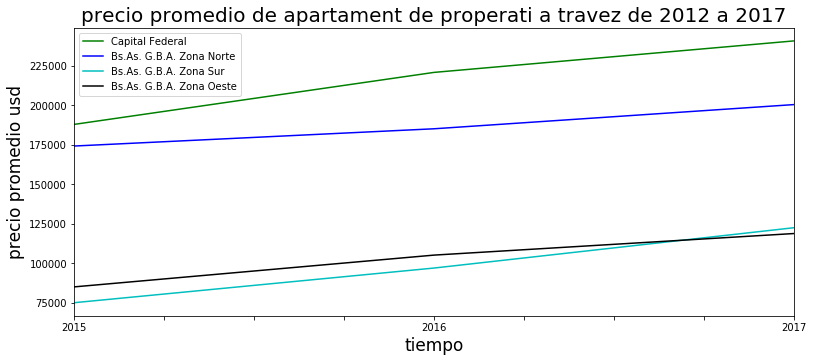

In [51]:
#precio promedio de apartament de properati a travez de 2012 a 2017
%matplotlib inline

fig = plt.figure(figsize=(10,4));
ax = fig.add_axes([0,0,1,1]);
cap=prop["state_name"]=="Capital Federal"

zn=prop["state_name"]=="Bs.As. G.B.A. Zona Norte"
zs=prop["state_name"]=="Bs.As. G.B.A. Zona Sur"
zo=prop["state_name"]=="Bs.As. G.B.A. Zona Oeste"
dep= prop["property_type"]=="apartment"
prop[['year','price_aprox_usd']][cap&dep].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='g',label="Capital Federal")


prop[['year','price_aprox_usd']][zn&dep].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='b',label="Bs.As. G.B.A. Zona Norte")

prop[['year','price_aprox_usd']][zs&dep].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='c',label="Bs.As. G.B.A. Zona Sur")

prop[['year','price_aprox_usd']][zo&dep].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='k',label="Bs.As. G.B.A. Zona Oeste")

plt.title('precio promedio de apartament de properati a travez de 2012 a 2017', fontsize=20);
plt.ylabel('precio promedio usd', fontsize=17);
plt.xlabel('tiempo', fontsize=17);
ax.legend();

## precio de casas en el tiempo

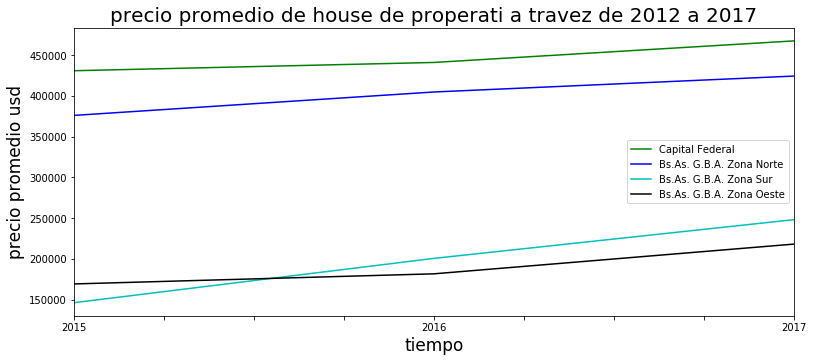

In [52]:
#precio promedio de  house de properati a travez de 2012 a 2017
%matplotlib inline

fig = plt.figure(figsize=(10,4));
ax = fig.add_axes([0,0,1,1]);
cap=prop["state_name"]=="Capital Federal"

zn=prop["state_name"]=="Bs.As. G.B.A. Zona Norte"
zs=prop["state_name"]=="Bs.As. G.B.A. Zona Sur"
zo=prop["state_name"]=="Bs.As. G.B.A. Zona Oeste"
cas= prop["property_type"]=="house"
prop[['year','price_aprox_usd']][cap&cas].groupby('year').agg\
({'price_aprox_usd':'mean',})['price_aprox_usd'].plot.line(c='g',label="Capital Federal")


prop[['year','price_aprox_usd']][zn&cas].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='b',label="Bs.As. G.B.A. Zona Norte")

prop[['year','price_aprox_usd']][zs&cas].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='c',label="Bs.As. G.B.A. Zona Sur")

prop[['year','price_aprox_usd']][zo&cas].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='k',label="Bs.As. G.B.A. Zona Oeste")
plt.title('precio promedio de house de properati a travez de 2012 a 2017', fontsize=20);
plt.ylabel('precio promedio usd', fontsize=17);
plt.xlabel('tiempo', fontsize=17);

ax.legend();

## precio locales en el tiempo

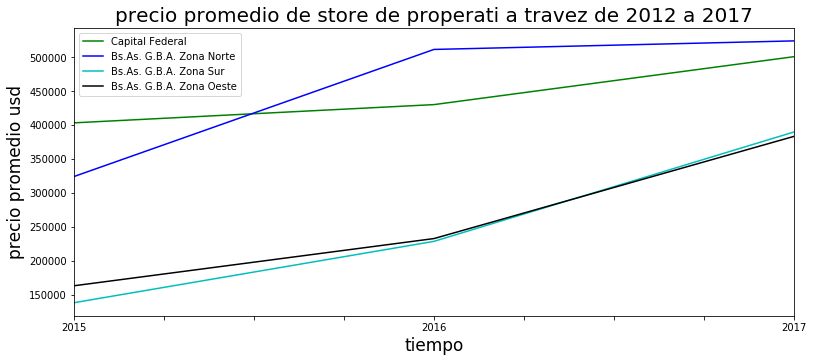

In [53]:
#precio promedio de  store de properati a travez de 2012 a 2017
%matplotlib inline

fig = plt.figure(figsize=(10,4));
ax = fig.add_axes([0,0,1,1]);
cap=prop["state_name"]=="Capital Federal"

zn=prop["state_name"]=="Bs.As. G.B.A. Zona Norte"
zs=prop["state_name"]=="Bs.As. G.B.A. Zona Sur"
zo=prop["state_name"]=="Bs.As. G.B.A. Zona Oeste"
alm= prop["property_type"]=="store"
prop[['year','price_aprox_usd']][cap&alm].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='g',label="Capital Federal")


prop[['year','price_aprox_usd']][zn&alm].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='b',label="Bs.As. G.B.A. Zona Norte")

prop[['year','price_aprox_usd']][zs&alm].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='c',label="Bs.As. G.B.A. Zona Sur")

prop[['year','price_aprox_usd']][zo&alm].groupby('year').agg\
({'price_aprox_usd':'mean'})['price_aprox_usd'].plot.line(c='k',label="Bs.As. G.B.A. Zona Oeste")
plt.title('precio promedio de store de properati a travez de 2012 a 2017', fontsize=20);
plt.ylabel('precio promedio usd', fontsize=17);
plt.xlabel('tiempo', fontsize=17);

ax.legend();

### observando los graficos podemos sacar de conclusiones que los precios siempre van en aumento y que en el año 2016 se produce un quiebre en el precio lo cual en varias zonas aumenta mas bruscamente los mismos y en otras se estanca, se ve que capital siempre es lo mas costozo para los diferentes tipos menos en almacenes en donde entre 2015 y 2016 zona norte es mas costoso en ese tipo de inmueble

# ¿como avanza en el tiempo la cantidad de publicaciones de properati?

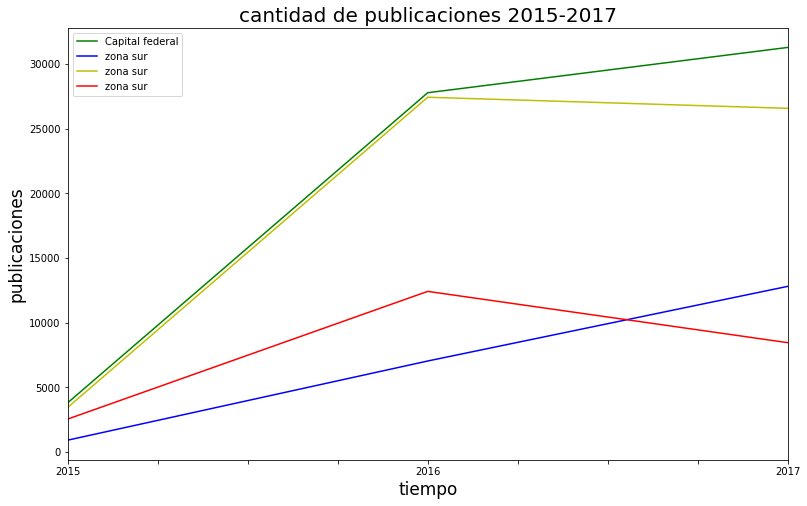

In [54]:
#cantidad de publicaciones de ventas,durante el 2015 a 2017
%matplotlib inline

fig = plt.figure(figsize=(10,6));

ax = fig.add_axes([0,0,1,1]);
#prop.groupby('year').count()['created_on'].plot.line(c='b',label="buenos aires y alrededores")

 #cantidad de publicaciones de ventas,durante el 2012 a 2017 solo en Capital federal
 
capital = prop['state_name']=="Capital Federal"
prop[capital].groupby('year').count()['created_on'].plot.line(c='g', label="Capital federal") 

sur = prop['state_name']=='Bs.As. G.B.A. Zona Sur'
prop[sur].groupby('year').count()['created_on'].plot.line(c='b', label="zona sur") 

norte = prop['state_name']=='Bs.As. G.B.A. Zona Norte'
prop[norte].groupby('year').count()['created_on'].plot.line(c='y', label="zona sur") 

oeste = prop['state_name']=='Bs.As. G.B.A. Zona Oeste'
prop[oeste].groupby('year').count()['created_on'].plot.line(c='r', label="zona sur") 

plt.title('cantidad de publicaciones 2015-2017', fontsize=20);
plt.ylabel('publicaciones', fontsize=17);
plt.xlabel('tiempo', fontsize=17);

ax.legend();
